In [1]:
import torch

**CLASSIFICATION**

Touching onto classification means that there involves deciding whether this or that. It basically boils down onto classifying an output. It is either this or it's not that. It's one thing or another. However, there are different problem types for classification but it does boil down into the following:

1. *Binary Classification* - As the name suggests, this decides whether this or that. It's 1 or 0. The target can be one of two options. An example of this would be identifying if this is a number or not. Is this a letter or not. If someone has a heart disease based on a certain parameter. It's yes or no.

2. *Multi-class Classification* - Target can be one of two or more options. There are more options to choose when it comes to this. So it can check if a bear is a brown, grizzly, or a black bear. So it's akin to Binary classification but there are a lot more options to choose.

3. *Multi-label Classification* - As opposed to the previous two this classification is quite the opposite. Instead of assigning the target to only one label or option. The target here can be assigned multiple labels or multiple options. So it is akin to a movie (target) having multiple categories (labels/options).

Remember how we dealt with predicting a number in *01-Workflow Fundamentals*? That was a regression task. This time, we're going to deal with classification. Regression and Classification are two of the most common types of machine learning problems.

This time, we're going to go through differentt classification problems in PyTorch. Basically, we will be receiving a set of inputs and then predicting what class those set of inputs belong to.

![Display](images/02-different-classification-problems.png "Basic Descriptions of Classification Problems")

**COVERAGE**

So in this chapter we'll be tackling classification but for the most part we'll retain the PyTorch Workflow that we originally used in the previous chapter which can be easily summarized into this:

![Display](images/01-pytorch-workflow.png "Basic PyTorch Workflow")

There is only one difference in this. We're going to work with a classification problem and not a linear problem that we did before, which was simply just predicting a straight line. So, the chapter goes as follows:

1. __Architecture of a Classification Neural Network__ - Neural networks can be in any shape or size but there is always a typica floor plan.
   
2. __Getting Binary Classification Ready__ -  Data can be anything that can be converted but to start, we'll be using a simple binary classification dataset.

3. __Building a PyTorch Classification Mode__ - In this section we will start creating the model to learn the patterns of the data. Choosing a *loss_function*, *optimizer*, and create a *training loop* to deal with classificatin.

4. __Fitting Model To Data__ - Since we've created our model already and the training loop, we need to start predicting and letting the model find patterns in the *training* data.

5. __Making Predictions & Evaluating Model__ - Once the model has checked for patters in the data, we need to make sure that the patterns it has detected fits the actual *testing* data that we have. Metrics such as accuracy is a good start.

6. __Improving Models: Stepping Weights__ - We have evaluated the performance of our model and we need to make some changes to ensure that it is being improved. Basically, we need to start updating/stepping the weights. Or do other changes such as on the learning rate, etc.

7. __Adding Non-Linearity__ - Linearity is pretty boring. Straight line's just doesn't cover enough ground for all possibilities such as non-linear problems. We need to make sure that the model can tackle non-linearity (non-straight lines). Using an activation function that covers nonlinearity such as *ReLU* is a good idea.

8. __Replicating Non-Linear Functions__ - We used non-linear functions such as *ReLU* to deal with non-inear data but what do these actually look like? We'll take a look.

9. __Combining Everything For Multi-class Classification__ - Once done with everything in creating binary classifaction, we'll be assembling everything together again with a multi-class classification problem. The reason that we're starting with binary classification is because it'll be easier to move on to multi-class classification afterward. It's akin to starting with two which are the basics and then just adding ontop of that. Afterall, binary and multi-class are both classifications at the end. 

**Architecture of a Classification Neural Network**

Before we get started with writing a classification neural network, we need to first be introduced with it's architecture to fully understand where we're going with this.

We're going to talk about *Hyperparameters* and what they are for both binary and multiclass classifications.

1. *Input Layer Shapes* / *in_features* -

Binary: It would be the same for the number of features. If we had 5 features then the input layers would also be 5. Example: We have age, sex, height, weight, and smoking status for prediccting a person with heard disese. There are 5 features that we specified (these are the age, sex, etc). 

Multiclass: Same as binary. 

2. *Hidden Layer(s)* -

Binary: This can be dependent on the problem. However the minimum would always be 1 while there is no limit to the maximum number of hidden layers.

Multiclass: Same as binary.

3. *Neurons per Hidden Layer* -

Binary: Also dependent on the problem. Generally this ranges from 10 to 512.

Multiclass: Same as binary.

4. *Output Layer Shape* / *out_features* -

Binary: 1 (it is either 1 or 0 or it is either this or that).

Multiclass: 1 per class specified. For example, it would be 3 if there are three classes. For example, if there are three bear types: black, brown, or grizzly. There would be 3 *out_features*.

5. *Hidden Layer Activation* -

Binary: Primarily ReLU (rectified linear unit) but there are plenty of different activation functions that can be used.

Multiclass: Same as binary.

6. *Output Activation* -

Binary: Sigmoid: *(torch.sigmoid)* / ReLU *(torch.ReLU)* 

Multiclass: Softmax *(torch.softmax)*

7. *Loss Function* -

Binary: Binary Cross Entropy *(torch.nn.BCELoss)*

Multiclass: Cross Entropy *(torch.nn.CrossEntropyLoss)* 

8. *Optimizer* -

Binary: SGD (Stochastic Gradient Descent) / Adam / etc. More on *torch.optim*

Multiclass: Same as binary. 

This is just akin to a simple ingredients list of a very diverse recipe that has many implementations and versions depending on the problem. The neural network components presented here can vary on the problem that is needed to be solved. 

But neverthless, this is enough to get our foot in the door and get started. 

Time to get coding.

**Make Classification Data + Readying It**

First, we need to make some data for a problem so that we can solve it. We'll be utilizing a new function from a different library to generate two circles with different colored dots. *make_circles()* from *scikit-learn*.

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles with samples
X, y = make_circles(n_samples,
                   noise=0.03, # Adding noise to the dots make them vary
                   random_state=42 # Keep random state/seed so we get the same values always
                   )

Let's start viewing the first 5 X and y values

In [3]:
print(f"First 5 X Features:\n{X[:5]}")
print(f"\nFirst 5 y Labels:\n{y[:5]}")

First 5 X Features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y Labels:
[1 1 1 1 0]


We can see here that each match there are two X's for each Y labels. Remember that one of the best ways to understand things is to -! Visualize Visualize Visualize !-
So let's do just that and put these into a *pandas DataFrame* - another library for visualization of data. Basically makes them a lot neater to look at.

In [4]:
import pandas as pd 
circles = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


With this it looks like for each X feature (X1 & X2) has a corresponding label (y) that has a value of either 1 or 0. 

This tells us that our probem is just **binary classification** because there are only two labels or two options which are either 1 or 0. 

Let's take a look as to how many values of each class is there. Basically, we're asking how many 1's and 0's are there. 

In [5]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

We can see that that they are perfectly balanced, with each label having 500 values.

Let's start plotting them so that we can visualize it even better.

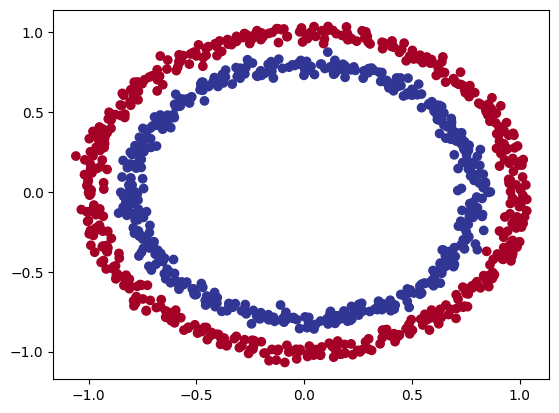

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu
           );

There are two circles in the visualization but remember that these two circles are just from *X - (X1 & X2)*. The *c=y* is the one that gives color to X features that are 1 or 0. Remember how each X feature has a corresponding Y label?

Now we have a problem to solve. Let's create a PyTorch neural network that is able to classify dots into either red (0) or blue (1).

**Segway:** This type of dataset is often considered as a toy problem because it is a problem that is used to try and test things in machine learning. 

This is a great example of how to learn classification because this presents us data that is represented as numerical values and we'd want to build a model that is able to classify these dots and seperate them into red or blue. 

**Input & Output Shapes**

One of the more common errors when dealing with deep learning is shape erros with data. Mismatching shapes of tensors and when conducting tensor operations result in errors with the models. 

It's fine to see these throughout the course because each time you succesfuly deal with one means that you've learned to something valuable to use down the line. This is helpful because there is no guaranteed way to avoid these. THEY WILL HAPPEN!

One of the best things to equip yourself is to always be familiar with the shapes of the data that you are going to work with. VISUALIZE VISUALIZE VISUALIZE.

You can easily ask yourself the simple question:

"What shapes are my inputs and what shapes are the outputs?"

Let's start answerin these questions.

In [7]:
X.shape, X.ndim, y.shape, y.ndim

((1000, 2), 2, (1000,), 1)

Our first dimension seems to be matching well since we have 1000 *X* and also 1000 *y*. But that still leaves us the question what to do with the second dimension of X? What is even in it? 

Viewing the values and shapes of a single sample (features & labels) is quite helpful since this gives you more information. Asking questions is never bad. Doing this will lead you to knowing more about your input and output shapes that you would expect from the model that you'll be making.

In [8]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}"),
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: 1


Remember when we created our X values that we had *X1* and *X2*? Doing the code above tells us that our X contains two values again. It reminds us that we are working with both X1 and X2 or two values for X_sample while for y_sample, we're dealing with only y. Just one value.

In machine learning terms, X_sample is a vector (Rank-1) while y_sample is a scalar (Rank-0).

**IMPORTANT:** Don't get confused with X_sample and X OR y_sample and y. 

X is a 2D array (Rank-2) because we have 1000's of these X_sample vectors. When we say X_sample we are referring to the 2nd dimension of the X matrix. SO basically, X is a 2D array (Rank-2) that contains a vector (Rank-1) in it's 2nd dimension.

y is a vector (Rank-1) because we have 1000's of these scalar values (rank-0).

There are a lot of points for error here because it can get a bit confusing.

**Turn Data To Tensors + Create Train & Test Splits**

We've looked into the input (X) and output (y) shapes of our data and now we can prepare for it's use with PyTorch for modelling. Turning this into steps:

1. Turn data into tensors (currently, our data is in NumPy arrays and we need to convert these into PyTorch tensors).

2. Split the data into training and test sets (we use the training set to train the model to learn the patters between X and y then we evaluate those learned patters on the test dataset).

In [9]:
# Turn data into PyTorch tensors

import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

Now that we have it in tensor format, let's start splitting it into training and testing datasets. We can do this much easier by utilizing *train_test_split()* from *Scikit-Learn*. We can do this manually but we've already done that before.

We'll set the *test_size=0.2* so that basically means we'll grab 20% for testing and the rest of the 80% would be for training. The splitting is random but we can set the seed as always so it won't be too random.

In [10]:
# Splitting the data to train & test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42
                                                   )

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

We've split it up to 800 training and 200 testing. Looking good!

**Building The Model**

We've already prepared our data so we start moving towards creating the model itself. We'll break this section down to different parts:

1. Setting up the device agnostic code - CPU / GPU.
2. Constructing a model by subclassing *nn.Module*.
3. Defining a loss function and optimizer.
4. Creating a training loop. - Next Section

Luckily, we've been through this already so it's not going to be a big jump in terms of what we'll be working on. The only thing changing is that we're going to work with a classification dataset. 

However, we'll be starting off with importing PyTorch and *torch.nn* for setting up the device agnostic code.

In [11]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

We've got the device portion setup and we can use it now for any data or models that we'll be making. PyTorch will automatically handle it on the CPU by default else in the GPU if it is available. 

Let's start working on the model.

We want a model that is capable of handling the *X* data as inputs and then produce the outputs in the same shape as the *y* data. 

Basically we want our model to perform as given with *X* (features) to predict *y* (labels). This setup where we have features and labels is referred to as **supervised learning**. This is because your data is telling the model what the outputs should be when given with a certain input.

When creating a model that does supervised learning, we'll need to handle the input and output shapes of *X* and *y*. 

We'll see why the input and output shapes are critical:

Creating a model class that:

1. Subclasses *nn.Module* (almost all PyTorch models are subclasses of *nn.Module*)
   
2. Creates 2 *nn.Linear* layers in the constructor capable of handling the input and output shapes of *X* and *y*.
   
3. Defines a *forward()* method containing the forward pass computation for the model.

4. Instantiates the model class and sends it to the appropriate target *device*. 

In [12]:
#1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module): 
    def __init__(self): 
        super().__init__()
        #2. Create 2 nn.Linear Layers capable of handling X and y inputs.
        self.layer_1 = nn.Linear(in_features=2, out_features=5) 
        # X contains a vector (two values) so the in_features is 2.
        # This produces 5 features.
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
        # This takes the out_features of layer_1 and 
        # since y contains a scalar - 1 value then the this produces 1 feature.

    #3. Define a forward method containing the forward pass computation 
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x))

#4. Create an instance of the model alongside settng it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

Everything with the model's creation is pretty familiar except for just a major change in what is happening between *self.layer_1* and *self.layer_2*

*self.layer_1* takes 2 input features with the parameter *in_features* and produces 5 output features with the parameter *out_features*.

This is also known as having 5 **hidden units** / **neurons**

The layer turns the input data from having 2 features to 5 features.

Why is this important? Why even do this?

The reason for that is this because this is because this allows the model to learn the patterns from 5 numbers rather than just 2 meaning that it can *potentially* lead to better outputs and results. 

It's not guaranteed however. 

The number of hidden units that you can use in a neural network layer is a **hyperparameter** essentially meaning that it is a value that you can set by yourself and there is no *set in stone* value that you are required to use.

Just follow the simple rule that moderation is key. More hidden layers is good but too much can have it's drawbacks. The amount that you decide to use is dependent on the model type and the dataset that you are working on.

Since the dataset that we are currently working isn't that big and it's quite simple. we'll just put our hyperparameter value for neurons on the lower end. 

The **ONLY** rule that is required for hidden units is that in the subsequent layer, in our case, self.layer_2 has to take the same *in_features* as the previous *out_features*.

This is the reason why *self.layer_2* has 5 for it's *in_features*. It takes these from the *out_features* from *self.layer_1* and then performs linear computation on them turning these into 1 *out_features* which is the same shape as our *y*.

![Display](images/02-tensorflow-playground-linear-activation.png "Visualization of How Neurons Work")

This is what a similiar classification neural network would look like just like what we have done. It's a pretty good visualization ofw whatever is happening.

We can do the same thing as above utilizing *nn.Sequential*.

*nn.Sequential* performs a forward pass computation on the input data through the layers in the order that we place them.

In [13]:
# Replciating CircleModelV0 with nn.Sequential 
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

That's a lot easier and convenient to do rather than working with *nn.Module*. Not only that but *nn.Sequential* also automatically defines the forwardpass for you. 

It is a fact that *nn.Sequential* is absolutely great when working with straight-forward computations, however, as the namespace gives off, it will ALWAYS run in sequential order. 

So, in the case that you want something else to happen rather than just going straight for sequential computation, you'll want to define your own custom *nn.Module* subclass.


Now that we have our model, let's try passing some data through it.

In [14]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of Predictions: {len(untrained_preds)}, Shape:{untrained_preds.shape}")
print(f"Length of Test Samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 Predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 Labels:\n{y_test[:10]}")

Length of Predictions: 200, Shape:torch.Size([200, 1])
Length of Test Samples: 200, Shape: torch.Size([200])

First 10 Predictions:
tensor([[ 0.7156],
        [ 0.6840],
        [ 0.4572],
        [ 0.7902],
        [-0.0842],
        [-0.0993],
        [ 0.2410],
        [ 0.0562],
        [ 0.4805],
        [ 0.6759]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 Labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


We have the same number of predictions for the test samples so that's great! However, our predictions don't look like to be in the same shape or form as our test labels. 

Basically our test labels are 1 or 0. But none of our predictions resemble that. Our predictions should also be 1 or 0. 

Luckily, there's a fix for this and we'll get into that in a bit. 

**Setting Up Loss Function & Optimizer**

We've already created a loss function as well as a optimizer in the previous chapter so it's all the same. The issue that we have right now is that our problem requires a different loss function. 

Recall that our previous chapter worked with a problem dealing with regression / predicting a number. In that case, we would typically use mean absolute loss or *MAE* loss and it would work. However, this is a different case since we're now dealing with classification.

For binary classification such as ours, we'll often have to use *binary cross entropy* as the loss function.

In the case for our optimizer, we can still use the same one. Previously, we used *stochastic gradient descent* / *SGD* (*torch.optim.SGD()*) and we can still use it for this classification problems as well. 

It can carry over in a wide range of problems and the same case can be said for the *Adam* optimizer (*torch.optim.Adam()*).

Let's take a look at some loss functions and optimizers. 

1. *Stochastic Graient Descent (SGD) Optimizer* - Works with regression, classification, and many other types. *torch.optim.SGD()*

2. *Adam Optimizer* - Works with regression, classification, and many other types. *torch.optim.Adam()*

3. *Binary Cross Entropy Loss* - Binary classification. *torch.nn.BCEWithLogitsLoss()* or *torch.nn.BCELoss*.

4. *Cross Entropy Loss* - Multi-class classification. *torch.nn.CrossEntropyLoss*

5. *Mean Absolute Error (MAE) / L1 Loss* - Regression *torch.nn.L1Loss*

6. *Mean Squared ERror (MSE) / L2 Loss* - Regression *torch.nn.MSELoss*

Since we're working with a binary classification problem, let's work with *Binary Cross Entropy Loss*. Remember that a loss function measures how *wrong* the model is so the higher the loss, the worse the model. 

In addition, PyTorch often refers to loss functions as "loss criterion" or "criterion". There are many different means of describing these so just be a look out or else you might get confused. 

There are two binary cross entropy implementations that we can utilize:

1. *torch.nn.BCELoss()* - This creates a loss function that measures binary cross entropy between the target (label / y) and input (feature / X).
   
2. *torch.nnBCEWithLogitsLoss()* - This is exactly as above except for the fact that it also contains a sigmoid layer (*nn.Sigmoid*) built-in. More about this soon.

So with these two in mind, what are we supposed to use?

If we would take a look at the documentation for *torch.nnBCEWithLogitsLoss()*, it states that this is more *numerically* stable than using *torch.nn.BCELoss* after a *nn.Sigmoid* layer. 

So plainly speaking, implementation 2 is better. However, the downside for this is that you would want to seperate the *nn.Sigmoid* layer from *torch.nn.BCELoss()* when it comes to advanced and more complex usage. But, that's not the case for now and that is beyond the scope of this section.

With this in mind, it's time to create a loss function and an optimizer.

Since *SGD* is something that we are more familiar with since we've been dealing with it before and the fact that it is very capable for both regression and classification tasks, we'll be using this as our optimizer. 

Optimizer = *torch.nn.SGD()* combined with a learning rate of 0.1

In [15]:
# Creating a loss function with built-in Sigmoid
loss_fn = nn.BCEWithLogitsLoss() 

#Creating an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In addition, we're also going to create an **evaluation metric**.

This can be used as an additional perspective to how the model is progressing. If a loss function is a number to measure how 'wrong' a model's predictions are then the evaluation metric is a means of measuring how 'right' it is. 

So a loss is suited for the model's interpretation while an evaluation metric is better meant for human consumption. We create metrics for both the model and us. 

At the end of the day, they both do the same thing of measuring the model but an evaluation metric is important for an additional perspective which goes well for visualization as a core concept of deep learning.

Just think about it as dealing with shapes (which we are), it's always better to look at shapes from different angles to get a better grasp on it's structure. 

There are many different types of evaluation metrics to choose from and each one has a problem that it is best suited for, in our case we can start with an **accuracy** metric. 

Accuracy can be easily measured by simply dividing the total number of correct predictions over the total number of prediction made.

In other words, if we have a model that makes 99 correct predictions out of 100 then that would be an accuracy of 100%. Quite simple!

Let's make an accuracy function.

In [16]:
# Calculating Accuracy - Classification Metric
def accuracy_fn(y_true, y_pred):
    # Calculates where two tensors are equal
    correct = torch.eq(y_true, y_pred).sum().item() 
    acc = (correct / len(y_pred)) * 100
    return acc

**Train Model**

We have our data, loss function, and optimizer ready. Let's start training a model.

First, we have to create a PyTorch training loop. But before that we'll do a quick segway first.

**Going From Raw Model Outputs To Predicted Labels (Logits -> Prediction Probabilities -> prediction Labels)**

Let's take a look first as to what actually comes out of the model during the forward pass. In other words, let's take a look at the output of the forward() method. 

Try passing some data through the model.

In [17]:
X_test.shape, y_test.shape

(torch.Size([200, 2]), torch.Size([200]))

In [18]:
# Viewing the first 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device)[:5])
y_logits

tensor([[ 0.7156],
        [ 0.6840],
        [ 0.4572],
        [ 0.7902],
        [-0.0842]], device='cuda:0', grad_fn=<AddmmBackward0>)

Since the models are basically untrained with random weights at the start then these are just random values. But that doesn't answer the question of *what are they?*. 

The answer is that they're just the outputs for the *forward()* method that implemeneted two layers of *nn.Linear()* which just does the formula: 

y = x * weights^T + bias.

These are *raw* outputs (unmodified) from the equation above (y) and in turn the raw outputs of the model are often referred to as the **logits**.

Logits is the output of the model above when it is fed with the input data, in this case the X_test. However, there is one small issue with logits. It's harayd to interpret.

We'd much prefer if the numbers that we get are comparable to the truth labels or y which are basically just 1 and 0. Remember that we mentioned *Sigmoid* earlier? 

This is where it starts to play it's part. In order to conbert the model's raw outputs (logits) into a much more readable form, we use the *Sigmoid activation function*.

Let's try this out.

In [19]:
# Utilizing Sigmoid on Model Logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6716],
        [0.6646],
        [0.6124],
        [0.6879],
        [0.4790]], device='cuda:0', grad_fn=<SigmoidBackward0>)

Our outputs are now a lot more consistent. They're all in a much closer distance with each other as compared to before. Although they are still random. 

Due to the conversion with *sigmoid* these former logits are now called **prediction probabilities** or usually referred to as *y_pred_probs*. In other words, the values are now how much the model thinks that the data belongs to one class or another. 

Remember that our ideal outputs are 1 to 0 because we're dealing with binary classifications. So we can say that there is a decision boundary that can be placed with these prediction probabilities that we have.

The closer to 0 then that means the more the model thinks that the sample belongs to 0 and the same can be said for 1. If the values are closer to 1 then the more the model thinks that it belongs to 1. From this we can say:

If *y_pred_probs* >= 0.5 then y=1 (class 1)
If *y_pred_probs* < 0.5 then y=0 (class 0)

Notice that we're just primarily rounding them? That's what we're going to do. We turn the prediction probabilities into our exact prediction labels (y) by rounding the outputs of the sigmoid function.

**NOTE:** The decision boundary can be value that we want but in our case now, it's best if it's just between in the middle so 0.5 

In [20]:
# Find the predicted labels - rounding the prediction probabilities
y_preds = torch.round(y_pred_probs)

# In full - Meaning that we do everything that we did before in one go!
y_pred_labels = torch.round(torch.sigmoid((model_0(X_test.to(device))[:5])))

In [21]:
y_preds, y_pred_labels, y_preds.shape, y_pred_labels.shape

(tensor([[1.],
         [1.],
         [1.],
         [1.],
         [0.]], device='cuda:0', grad_fn=<RoundBackward0>),
 tensor([[1.],
         [1.],
         [1.],
         [1.],
         [0.]], device='cuda:0', grad_fn=<RoundBackward0>),
 torch.Size([5, 1]),
 torch.Size([5, 1]))

In [22]:
# Check for equality - Checking accuracy 

# We check that our manual way of doing things before and the all-in-one go that we did are equal. Meaning that they
# outputted the same exact thing. We do .squeeze() because we have an extra dimension that we aren't necessarily using
# but this is also important later on when we use these with the loss function

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze(), y_pred_labels.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


(tensor([1., 1., 1., 1., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>),
 tensor([1., 1., 1., 1., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>))

We can now see that our predictions match our prediction labels. That means our predictions can now be easily compared to our labels and used to see if they match them or not. So if our prediction output a False and our truth labels for that specific target is True. Then these won't match meaning a decrease in accuracy. 

Going back, we converted our model's raw outputs which came out as logits into prediction probabilities then applying sigmoid activation function to narrow this down into the range between 0 and 1. Afterwards, we set a decision line to round the numbers into either 1 or 0 - our classes. 

**NOTE:** Sigmoid function is typically only applied to Binary Classification logits. Because, it functions well due to the fact that it goes between 1 - 0. If we were working with multi-class classification then we'd need to use the *softmax activation function*. 

Lastly, we mentioned *nn.BCEWithLogitsLoss* earlier which specified that it is a loss function that already contains the sigmoid function. That means we don't hae to manually apply the the sigmoid function as we did here since that will automatically be taken care of. 

**Building The Training & Testing Loop**

Time to start building our training & testing loop. Let's start with 100 epochs and output the model's results every 10 epochs. 

In [23]:
torch.manual_seed(42)

# Setting the number of epochs
epochs = 100

# Placing data into target device
X_train, y_train = X_train.to(device), y_train.to(device) 
X_test, y_test = X_test.to(device), y_test.to(device)

# Building the training loop
for epoch in range(epochs):
    
    ### SETTING TRAINING
    model_0.train()

    # Forward Pass 
    # Still confused with why applying squeeze is important? Try removing it down below and see what happens
    train_logits = model_0(X_train).squeeze() # Removing the extra '1' dimension 
    train_preds = torch.round(torch.sigmoid(train_logits)) # Turning logits -> prediction probabilities -> prediction labels

    # Calculate loss 
    # Take a look on the shape of y_train -- this is critical for realizing why squeeze() is important on train_logits
    loss = loss_fn(train_logits, y_train) # Using nn.BCEWithLogitsLoss working with raw logits

    # IF we were using nn.BCEloss then we apply sigmoid function manually
    # loss = loss_fn(torch.sigmoid(y_logits), y_train)

    # Calculate accuracy
    acc = accuracy_fn(y_train, train_preds)

    # Reset Optimizer
    optimizer.zero_grad()

    # Backprop
    loss.backward()

    # Step weights
    optimizer.step()

    ### SETTING EVAL
    model_0.eval()
    with torch.inference_mode():
        # Forward Pass
        test_logits = model_0(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        # Loss
        test_loss = loss_fn(test_logits, y_test)
        # Accuracy
        test_acc = accuracy_fn(y_test, test_preds)

    # Printing outputs per 10 epcohs
    if epoch % 10 == 0:
        print(f"EpochL: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}")

EpochL: 0 | Loss: 0.71825, Accuracy: 53.87% | Test Loss: 0.72216, Test Acc: 54.50
EpochL: 10 | Loss: 0.70394, Accuracy: 51.88% | Test Loss: 0.70851, Test Acc: 52.00
EpochL: 20 | Loss: 0.69916, Accuracy: 51.00% | Test Loss: 0.70353, Test Acc: 49.50
EpochL: 30 | Loss: 0.69712, Accuracy: 50.75% | Test Loss: 0.70113, Test Acc: 48.50
EpochL: 40 | Loss: 0.69599, Accuracy: 50.88% | Test Loss: 0.69965, Test Acc: 50.50
EpochL: 50 | Loss: 0.69524, Accuracy: 50.12% | Test Loss: 0.69858, Test Acc: 52.00
EpochL: 60 | Loss: 0.69471, Accuracy: 49.88% | Test Loss: 0.69777, Test Acc: 51.00
EpochL: 70 | Loss: 0.69432, Accuracy: 50.25% | Test Loss: 0.69713, Test Acc: 50.00
EpochL: 80 | Loss: 0.69402, Accuracy: 50.00% | Test Loss: 0.69662, Test Acc: 50.00
EpochL: 90 | Loss: 0.69379, Accuracy: 50.00% | Test Loss: 0.69622, Test Acc: 49.50


There doesn't seem to have an error but there is quite a small problem with this. Have you noticed?

It's stuck at around 50%. The model went through both training and testing loops fine but the loss doesn't necessarily seem to be improving for both training loops. Since we're dealing with binary classification then that just means that our data is more or less randomly guessing since we're stuck at 50%. With 500 samples of class 0 and class 1, a model predicting one class or the other would achieve 50% accuracy.

**Creating Predictions & Evaluating The Model**

There is a problem with our model since it's randomly guessing but what exactly is the problem?

Can't figure it out? Let's go back to visualization! First, we need to create a plot for our model's predictions then we also need to plot the data that it's trying to predict on + the decision boundary it's creating for whether or not something is class 0 or class 1.

This time, we're lucky enough to have tools to help us in visualize this. We're enlisting the help of *Learn PyTorch for Deep Learning* repository that holds the *helper_functions.py* script. This scrip has a helpful function called *plot_decision_boundary* which basically creates a NumPy meshgrid to visually plot the different points where the model would be predicting the certain classes.

We will also import *plot_predictions* which we already used previously in *Workflow Fundamentals*.

In [24]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


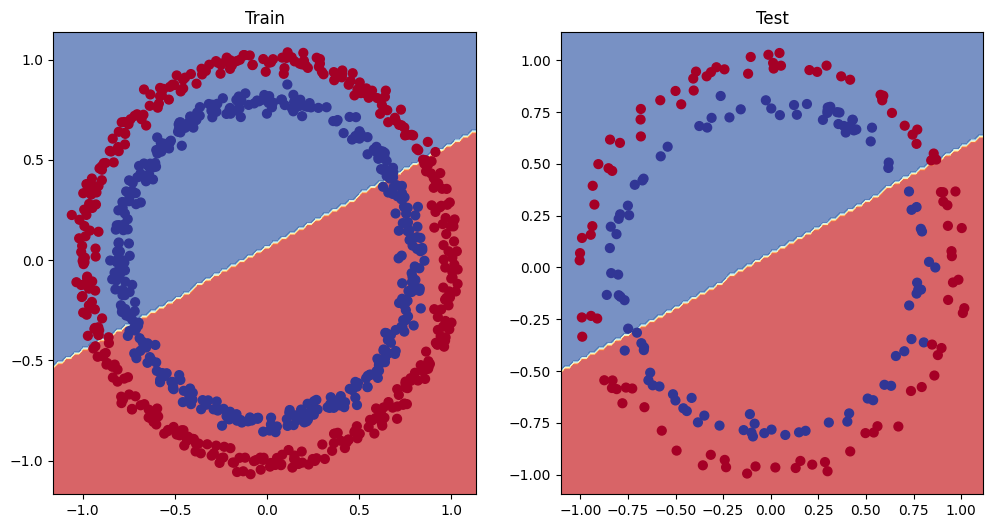

In [25]:
# Plotting decision boundaries for training & test sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

Notice the straight line running down the middle? It's splitting the red and blue dots. 

That's why it's 50% because the line doesn't match how our data works. Our data is circular and it's trying it's best to cut down the line in the middle to just get the best that it can do with what it's given. It's like trying to fit hand into a shoe.

In terms of machine learning, the model is *underfitting* meaning that it isn't even learning the patterns of the data. 

So, how could we address this "linear problem"?

**Improving Models - From a Model Perspective**

This section, we'll look into potential solutions that we can use to improve or fix a model. We won't be changing the data whatsoever because as it stands, our data looks fine already! So we've narrowed it down to our model. Here, we'll take a look onto these steps that we can use to work with:

1. *Adding More Layers*: Each layer has the potential of improving the model's learning capabilities since each layer can learn some kind of new pattern with the data. Think of adding a layer as a new pattern it can recognize. More layers makes the neural network **deeper**

2. *Adding More Hidden Units*: Or adding more neurons per layer also means a potential increase in the learning capabilities of the model, this is referred to making a neural network **wider**. Think of it as adding more eyes to the neural network.

3. *Fitting For Longer - More Epochs*: Just adding more epochs adds more opportunities for the model to look at the data and the layers to learn more patterns.

4. *Changing Activation Functions*: Some data just can't work with certain activation functions. For example, in our case, whatever we do we can't fit a sraight line to match a circle. We might have to work with something aside from a straight line *Hmmmmm???*.

5. *Change Learning Rate*: While a bit far from model specific, it is still a hyperparameter that decides how much the optimizer should change the parameter for each step. If it's too big then we risk memorizing the entire data, if it's too little then it probably won't have enough time to learn the patterns of the data.

6. *Changing Loss Function*: Similiar to the previous change, not too model specific but vital. Different problems require different loss functions. You can't work with a multi-class classification while using a binary cross entropy loss function because they are meant for two different things.

7. *Transfer Learning*: Taking something that has already been trained on a similiar problemset and adjust that to fit your own needs. Will be covered in *Chapter-06 Transfer Learning*

**NOTE:** Notice how you can manually change these according to what you think that you need. These are called **Hyperparameters**. This is a part where machine learning is not-too-sciency because there's not really much you can do when it comes to knowing what are the best hyperparamaters to work with. There's no guarantee or clear-cut solution. Good thing the word 'experiment' exists in the world of science because that will be what we're going to do. 

Let's start experimenting with some of the solutions. First, we'll try out what happens if we add more layers to our model, fit for longer (setting epochs to 1000 instead of 100), and also increasing the number of hidden units/neurons from 5 to 10.

In [26]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10) # Extra Layer
        self.layer3 = nn.Linear(in_features=10, out_features=1) 

    def forward(self, x):
        return self.layer3(self.layer2(self.layer1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

We've now created a new model with an additional layer, we'll recreate the loss and optimizer is

In [27]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

Time to do all the training & testing loop again. The change would only be on the number of epochs.

In [28]:
torch.manual_seed(42)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### SET TRAINING
    model_1.train()
    # FORWARD PASS
    train_logits = model_1(X_train).squeeze()
    train_preds = torch.round(torch.sigmoid(train_logits))
    # CALC LOSS
    loss = loss_fn(train_logits, y_train)
    # ZERO GRAD
    optimizer.zero_grad()
    # BACKPROP
    loss.backward()
    # STEP WEIGHTS
    optimizer.step()
    # CALC ACC
    acc = accuracy_fn(y_train, train_preds)

    ### SET EVAL
    model_1.eval()
    with torch.inference_mode():
        # FORWARD PASS
        test_logits = model_1(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        # CALC LOSS & ACC
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)

    # Printing outputs per 100 epcohs
    if epoch % 100 == 0:
        print(f"EpochL: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}")

EpochL: 0 | Loss: 0.69396, Accuracy: 50.88% | Test Loss: 0.69261, Test Acc: 51.00
EpochL: 100 | Loss: 0.69305, Accuracy: 50.38% | Test Loss: 0.69379, Test Acc: 48.00
EpochL: 200 | Loss: 0.69299, Accuracy: 51.12% | Test Loss: 0.69437, Test Acc: 46.00
EpochL: 300 | Loss: 0.69298, Accuracy: 51.62% | Test Loss: 0.69458, Test Acc: 45.00
EpochL: 400 | Loss: 0.69298, Accuracy: 51.12% | Test Loss: 0.69465, Test Acc: 46.00
EpochL: 500 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69467, Test Acc: 46.00
EpochL: 600 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Acc: 46.00
EpochL: 700 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Acc: 46.00
EpochL: 800 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Acc: 46.00
EpochL: 900 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Acc: 46.00


What? There's no changes at all! But we changed the number of epochs and even changed the number of layers + the neurons/hidden units. That's three improvement methods that we added but nothing changed at all. 

Let's get back to visualizing our data, perhaps there would be more details on the exact issue that we're facing.

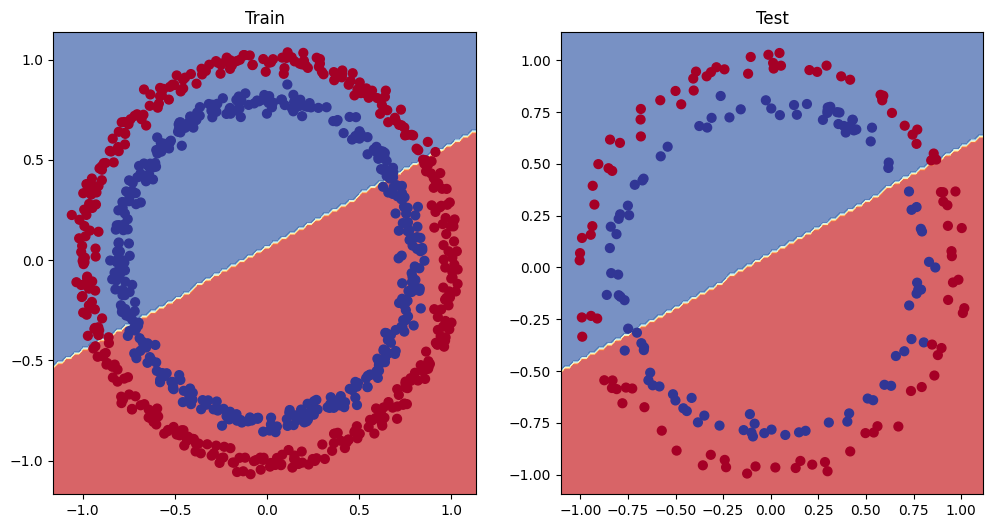

In [29]:
# Plotting decision boundaries for training & test sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

It's still drawing a straight line and dividing the circle by half. Let's experiment. Since our model is drawing a straight line, can it perhaps model linear data? Similiar to we did with the model in *PyTorch Workflow Fundamentals*? 

**Experimenting With Linear Data**

Let's try creating some linear data to try our model on and visualize what would happen.

In [30]:
# Creating Linear Data

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear Regression Formula

# Check Data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [31]:
# Splitting Data into Training & Testing Sets
train_split = int(0.8 * len(X_regression)) # Get 80%
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

In [32]:
print(len(X_train_regression))
print(len(y_train_regression))
print(len(X_test_regression))
print(len(y_test_regression))

80
80
20
20


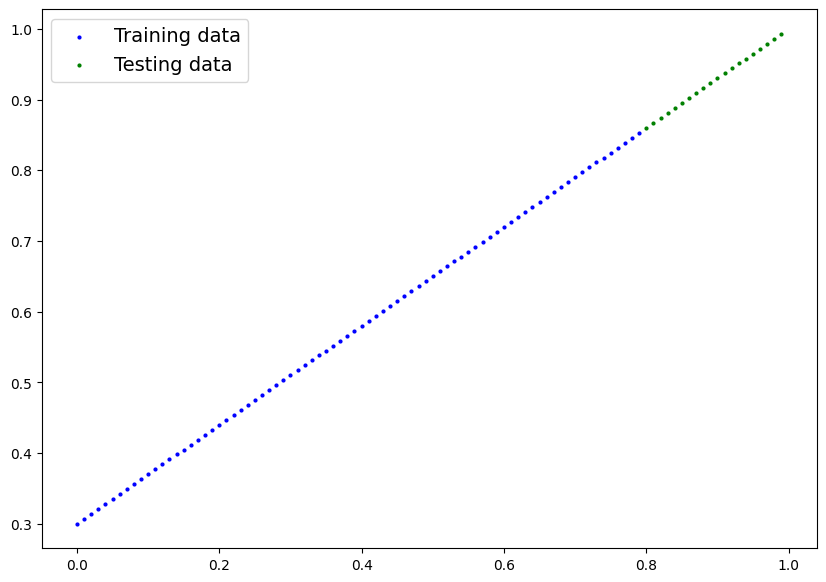

In [33]:
# Visualizing using plot_prediction() 
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

**Adjusting Model_1 To Fit Straight Line**

Let's recreate *Model_1* to make it fit our regression problem. We'll also change the loss function since we're no longer dealing with a classification problem with our experiment. We'll utilize *nn.Sequential*

In [34]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

The setup loss function that we'll be using is *nn.L1Loss()*. It's similiar to mean absolute error. The optimizer will be retained as SGD.

In [35]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

Let's do the training & test loop again but this time for linear regression.

In [36]:
torch.manual_seed(42)
epochs = 1000 

# SET DATA TO DEVICE
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### SET TO TRAIN
    model_2.train()
    # FORWARD PASS
    train_pred = model_2(X_train_regression)
    # CALC LOSS
    loss = loss_fn(train_pred, y_train_regression)
    # ZERO GRAD
    optimizer.zero_grad()
    # BACKPROP
    loss.backward()
    # STEP WEIGHTS
    optimizer.step()
    ### SET TO EVAL
    model_2.eval()
    with torch.inference_mode():
        # FORWARD PASS
        test_pred = model_2(X_test_regression)
        # CALC LOSS
        test_loss = loss_fn(test_pred, y_test_regression)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986, | Test Loss: 0.54143
Epoch: 100 | Loss: 0.09309, | Test Loss: 0.02901
Epoch: 200 | Loss: 0.07376, | Test Loss: 0.02850
Epoch: 300 | Loss: 0.06745, | Test Loss: 0.00615
Epoch: 400 | Loss: 0.06107, | Test Loss: 0.02004
Epoch: 500 | Loss: 0.05698, | Test Loss: 0.01061
Epoch: 600 | Loss: 0.04857, | Test Loss: 0.01326
Epoch: 700 | Loss: 0.06109, | Test Loss: 0.02127
Epoch: 800 | Loss: 0.05599, | Test Loss: 0.01426
Epoch: 900 | Loss: 0.05571, | Test Loss: 0.00603


Seems like the loss is going down! Unlike how our model_1 works previously, this seems to be doing better and actually learning the patters of a straight line. Let's take a look and plot the predictions too. 

Remember that for visualization, we're using *matplotlib*. This doesn't support PyTorch tensors much more for data on GPU Devices. So we'll have to transition our data back to the CPU before we pass it on to *matplotlib*

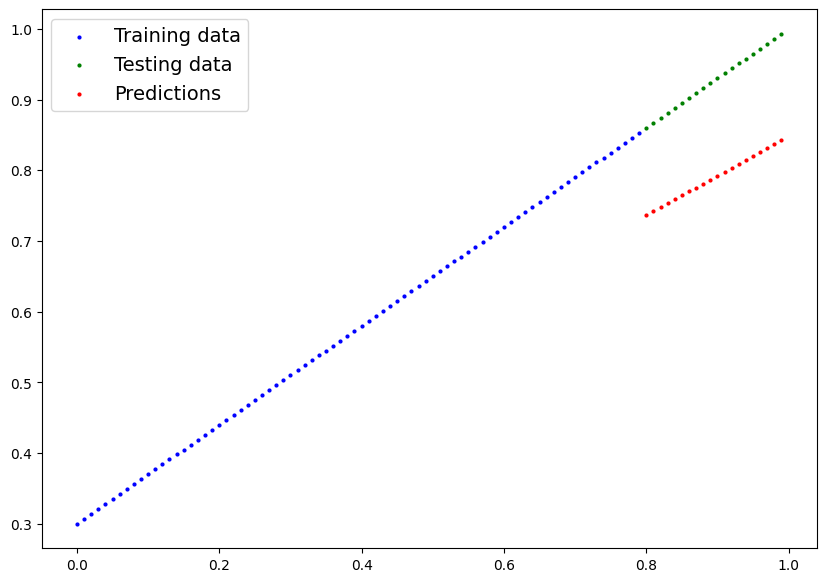

In [37]:
model_2.eval()

with torch.inference_mode():
    y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression.cpu(),
    train_labels=y_train_regression.cpu(),
    test_data=X_test_regression.cpu(),
    test_labels=y_test_regression.cpu(),
    predictions=y_preds.cpu()
);

Seems like the model is capable of guessing on straight lines rather than circles. No more random predictins here or standing on the 50% mark. This is a good thing because we know that the model can learn.

One of the great ways to troubleshoot a model is to always start small and scale up as you go. What does it mean by starting small? Not many layers, not many neurons, and a small dataset to work with. 

In addition, it's one of the few cases where **overfitting** can be a good idea to do on that small dataset. Then by gradually increasing the amount of data exposed to the model, you'll be able to reduce overfitting.

With these , we can start working out the next piece of the puzzle.

**The Missing Piece: Non-linearity**

We've noticed how our model is capable of drawing and predicting straight (linear) lines primarily due to the linear layers that we are using. 

But, what if we're dealing with non-linear / non-straight lines? 

We need to be able to accomodate for those situations as well but how do we exactly do that?

**Recreating Non-Linear Data (Red & Blue Circles)**

First, let's try making our data again. Same setup as before just reworking them.

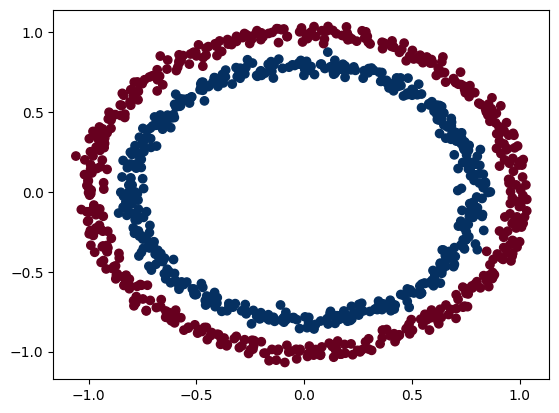

In [38]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

Same as before, let's split these into 80% of the data for training and the remaining 20% for testing. We'll still use the train_test_solit from *sklearn*.

In [39]:
import torch
from sklearn.model_selection import train_test_split

# Turn Data Into Tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42
                                                   )

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

**Building Model With Non-Linearity**

Let's imagine what we can draw with an unlimited straight line (linear)? There's a lot of things that we can cover with that but can you imagine if we had something that also draw non-straight lines? (non-linear)?

The possibilities are almost endless and creativity is king. 

So far, the neural networks that we have been making can only accomodate linear (straight) line functions. But the data that we are currently working with is non-linear (circles).

It's no wonder why we couldn't make it work. Let's try to imagine what if we had the capability to make our model handle **non-linear activation functions?**

Let's take a look.

PyTorch already has these **ready-made non-linear activation functions** built-in. They are all similiar but can do different things. 

One of the most common methods of handling non-linearity due to it's very good performance is **ReLU** (*rectified linear-unit, torch.nn.ReLU()*).

But talking about it won't do us much good so let's try actually using it in the moddel. 

In [40]:
# Building a model with a non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.relu = nn.ReLU()
        # ReLU & Sigmoid both are capable of handling non-linear problems 
        # However, ReLU is more common nowadays but if you want to use Sigmoid
        # then self.sigmoid = nn.Sigmoid() will do just fine, it would mean
        # that you won't need to use it on the predictions anymore
        self.layer3 = nn.Linear(in_features=10, out_features=1)
       
    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.layer1(x))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (relu): ReLU()
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)


![Display](images/02-tensorflow-playground-relu-activation.png "Visualization of How Neurons Work")

Above is a great exmaple of visualization on what this neural network would look like with ReLU as the activation function. 

**Things To Ponder**: Where would be the best place to put non-linear activation functions when constructing neural networks? There's no definite answer for this but there is one rule of thumb that you can consider.

The best places is between hidden layers and just right after the output layer. However, feel free to experiment around as you learn more about neural networks. There are many different ways of assembling things together. 

It's up to you to discover.

Since we have a model that is ready and can accomodate for non-linear problems, let's create  the binary classification loss and the optimizer.

In [41]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [42]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

**Training Model With Non-Linearity**

In [43]:
torch.manual_seed(42)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### SET MODEL TO TRAIN
    model_3.train()
    # FORWARD PASS
    train_logits = model_3(X_train).squeeze()
    # ROUND + SIGMOID
    train_preds = torch.round(torch.sigmoid(train_logits))
    # CALC LOSS (MODEL) & ACC (USER)
    loss = loss_fn(train_logits, y_train)
    acc = accuracy_fn(y_train,  train_preds)
    # WEIGHT ZERO
    optimizer.zero_grad()
    # BACKPROP
    loss.backward()
    # STEP WEIGHT
    optimizer.step()

    ### SET MODEL TO EVAL
    model_3.eval()
    with torch.inference_mode():
    # FORWARD PASS
        test_logits = model_3(X_test).squeeze()
    # ROUND + SIGMOID
        test_preds = torch.round(torch.sigmoid(test_logits))
    # CALC LOSS & LOSS
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69833, Accuracy: 50.00% | Test Loss: 0.69863, Test Accuracy: 49.00%
Epoch: 100 | Loss: 0.69289, Accuracy: 50.88% | Test Loss: 0.69411, Test Accuracy: 47.00%
Epoch: 200 | Loss: 0.69015, Accuracy: 53.37% | Test Loss: 0.69141, Test Accuracy: 50.00%
Epoch: 300 | Loss: 0.68762, Accuracy: 56.62% | Test Loss: 0.68828, Test Accuracy: 55.00%
Epoch: 400 | Loss: 0.68469, Accuracy: 60.00% | Test Loss: 0.68469, Test Accuracy: 61.00%
Epoch: 500 | Loss: 0.67985, Accuracy: 56.00% | Test Loss: 0.67890, Test Accuracy: 60.50%
Epoch: 600 | Loss: 0.67280, Accuracy: 56.00% | Test Loss: 0.67176, Test Accuracy: 60.50%
Epoch: 700 | Loss: 0.66304, Accuracy: 64.50% | Test Loss: 0.66452, Test Accuracy: 65.00%
Epoch: 800 | Loss: 0.64710, Accuracy: 74.12% | Test Loss: 0.65300, Test Accuracy: 71.50%
Epoch: 900 | Loss: 0.62182, Accuracy: 81.62% | Test Loss: 0.63241, Test Accuracy: 78.00%


Seems like the model's accuracy and loss are improving on both the training and test sets! That's GREAT. 

Since our model can now also accomodate non-linear functions due to ReLU our model isn't having a hard time working with only a straight line in it's arsenal. 

Let's try to look at this in a more visual perspective. For sure that'll be more exciting.

In [44]:
model_3.eval()
with torch.inference_mode():
    test_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
    # Keep the preds in the same shape as the labels
test_preds[:10], y[:10]

(tensor([1., 1., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

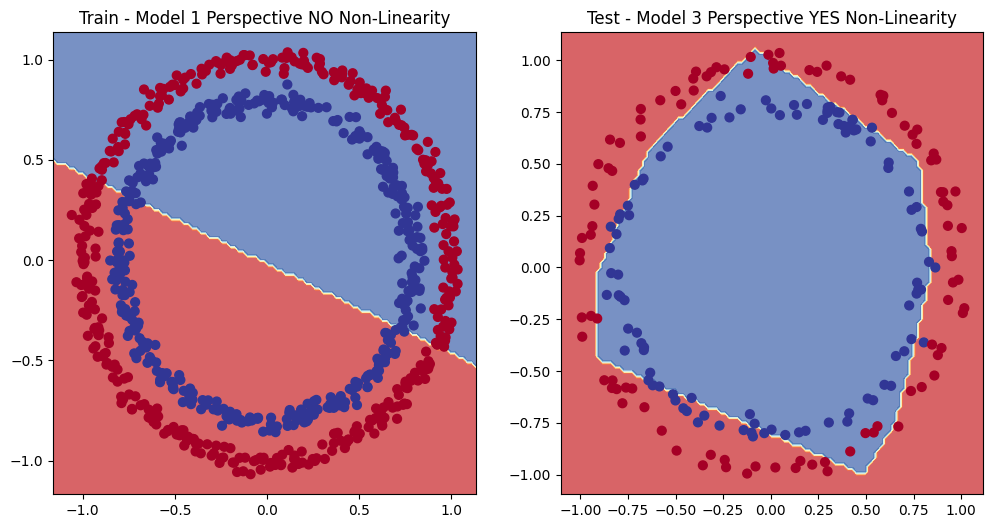

In [45]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train - Model 1 Perspective NO Non-Linearity")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test - Model 3 Perspective YES Non-Linearity")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

Take a look at our plotting. We are comparing our very first model that had no non-linearity with our current model that has non-linearity. 

See the difference? It can now accomodate and shape itself to the pattern of a circle. Much like what our data is! That's a big step.

Try playing around with the number of epochs and see how our model can be improved. Maybe adding more layers or neurons? Experiment!!!

**Replicating Non-Linear Activation Functions**

Adding a non-linear activation function can help the model in working with non-linear data. But what does exactly a non-linear activation look like? 

**NOTE:** For the majority of the time, the data that you would be working on is non-linear or at least a combination of both. As of now, we are working with dots on a 2D plot but in the real world, real data can be daunting. 

For example, if we had images of plants that we would want to classify, there are plenty of different plant types to consider. Different shapes and such. 

Maybe we would be working with text from Wikipedia and we'd like to summarize them, there are plenty of different words that have numerous combinations (linear and non-linear patterns).

Going back to the question earlier of what a non-linear activation looks like, let's try first replicating some and what they do. 

First, we're going to need some data to work with.

In [46]:
# Create experimental/toy tensor
A = torch.arange(-10,10,1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

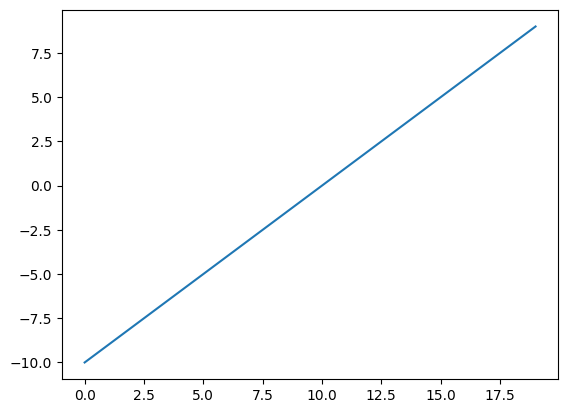

In [47]:
# Visualizing Data in a Plot
plt.plot(A);

It's a straight line. Now, what happens if we use the ReLU Activation function on it and see how it influences the straight line. 

But this time, we won't be using PyTorch's built in *torch.nn.ReLU* instead we'll be making it ourselves. 

The ReLU functions in a nutshell turns all the negatives to 0 and leaves the positive values as is. So basically, we're removing all the negatives. This works similiarly to the Sigmoid function.

In [48]:
# Create ReLU Manually
def relu(x):
    return torch.maximum(torch.tensor(0), x) # The input must be a tensor
    # torch.maximum takes all the maximum values from torch.tensor(0) and x,
    # So the negatives from x are replaced by 0 from torch.tensor(0)

# Pass by experimental/toy tensor into ReLU Function
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

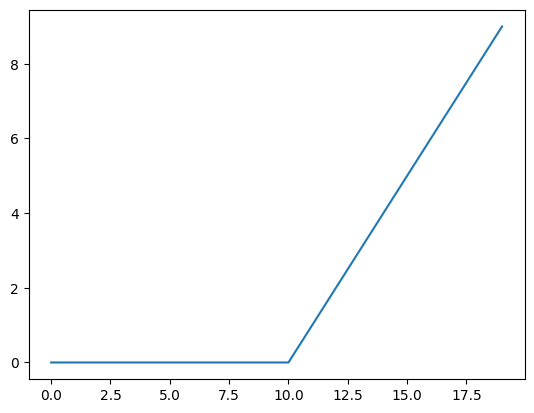

In [49]:
# Plotting the data after ReLU application
plt.plot(relu(A))

We've succesfully recreated the ReLU function! It wasn't that hard and the concept itself is relatively simple. It's not magic. Just basic mathematics. 

Let's take a look at the sigmoid function as it functions similiarly and is also an activation function like ReLU.

The sigmoid function formula goes along like:

In [50]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

Remember the prediction probabilities that we had earlier? Also notice how there isn't any negative values in the outputs. Let's try graphing this out.

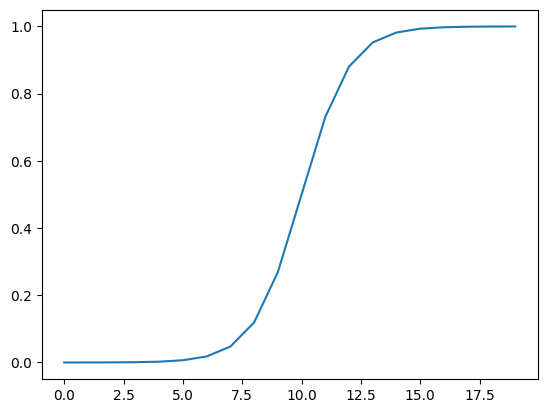

In [51]:
# Plotting the data after Sigmoid application
plt.plot(sigmoid(A))

Notice how the sigmoid function is a curved while ReLU is pretty much straight lines. These two are the most common types of activation functions that you would encounter when dealing with non-linear data. 

If you think about it, what type of patterns can you make if you have an unlimited amount of linear and non-linear lines? You can use lines and curved. 

You can make almost anything with these in hand. That's exactly what we want and what our model is capable of when we combine both linearity and non-linearity. 

What we are doing is not telling our model what to do and how to do it. Instead, we're just giving it the necessary tools that it needs to be able to solve a problem. You can't expect a mine to be dug and ores to come out without a pickaxe, correct? 

**Putting Things Together - Building Multiclass PyTorch Model**

We've covered a large section already and discussed many different 'mysteries' when dealing with neural networks, but it's time to finally put all these newly discovered information to good use. This time, we're going to implement all that we've learned in a multiclass classification problem. 

Recall that a binary classification problem revolves around a "this or that" / "0 or 1" concept. While multiclass classification deals with having more options. So it's much akin to "it's this or the many other options". 

![Display](images/02-binary-vs-multi-class-classification.png "Multiclass Classification vs Binary Classification")

As shown in the image, this is an example of what binary and multiclass classifications look like. For example, one of the more popular datasets for computer vision benchmarks is the *ImageNet-1k Dataset* which has 1000 classes.

**Creating Multiclass Classification Data**

Before we get started with solving a multiclass classification problem, we'll need some multiclas data to work with. 

As before to make our lives easier, we'll be using *Scikit-Learn - make_blobs()* method.

This gives us the capacity to create data with how many classes that we want by utilizing the *centers* parameter. So let's go over this in a step-by-step basis first.

1. Create multiclass data with *make_blobs()*.
2. Turn the data into tensors as *make_blobs()* provides the data in NumPy arrays.
3. Split the data into a training and testing set.
4. Visualize the created data.

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


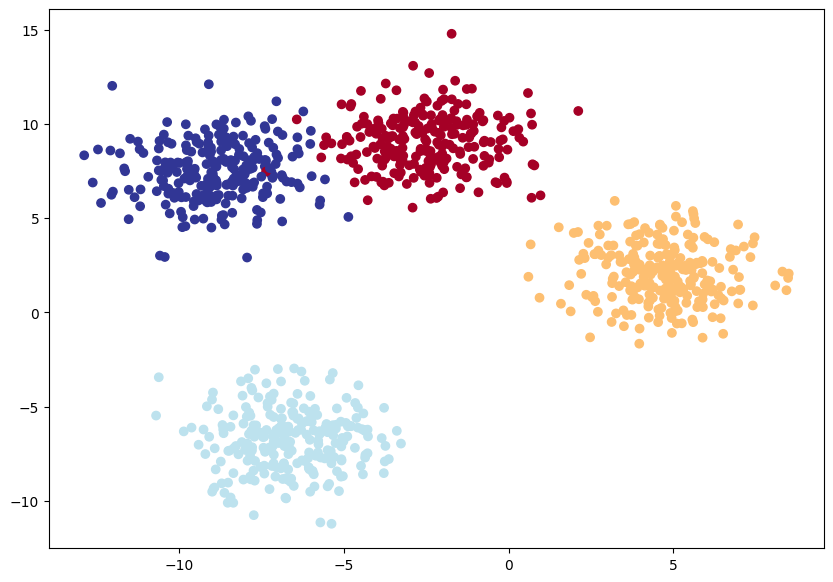

In [52]:
# Import Dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create Multiclass Data
X_blob, y_blob = make_blobs(n_samples=1000,
                           n_features=NUM_FEATURES, # X Features
                           centers=NUM_CLASSES, # y Labels
                           cluster_std=1.5, # Gives clusters some 'uniqueness'
                           random_state=RANDOM_SEED 
                           )

# Turn Data Into Tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])


# Split Data Into Train & Test Sets
X_blob_train, X_blob_test, y_blob_train,  y_blob_test = train_test_split(
    X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# Plot Data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

In [53]:
X_blob_train.dtype, X_blob_test.dtype

(torch.float32, torch.float32)

Each color represents a different class. Notice how we have at four colors? That means our multiclass data contains 4 classes. Now that we've made the data, we're ready to get started. Let's create a model to seperate the coloured blobs.

**Building Multiclass Classification Model in PyTorch**

We've been building many models already just from the previous two sections and you might have started to realize how flexible we can be when it comes to working with neural networks. 

Can you think about how we can build a model that is similiar to *model_3* but modified in the way that we can accomodate for multiclass data?

Let's create a new subclass of *nn.Module* that has three hyperparameters:

1. *input_features*: The number of *X* that the model takes
2. *output_features*: The ideal number of output features we would want, this is equivalent to the number of classes (*NUM_CLASSES*) that we specified earlier.
3. *hidden_units*: The number of hidden neurons that we want per layer.

Because we're putting everything together again, we'll create some device agnostic code. (Yes, we already did this and there's no need to keep repeating it but it's good practice.)

Afterwards, we'll start making the model with the set hyperparameters mentioned above.

In [54]:
# Create Device Agnostic Code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [55]:
from torch import nn

# Building Model
class BlobModel(nn.Module):
    def __init__(self, input_features, out_features, hidden_units):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(input_features, hidden_units),
            # nn.ReLU(), # Play around and see what happens if we don't have non-linearity covered.
            nn.Linear(hidden_units, hidden_units),
            # nn.ReLU(), # Play around and see what happens if we don't have non-linearity covered.
            nn.Linear(hidden_units, out_features),
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel & Send to device
model_4 = BlobModel(input_features=NUM_FEATURES, 
                    out_features=NUM_CLASSES, 
                    hidden_units=10).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=4, bias=True)
  )
)

Notice how we shortened our entire model by using a *nn.Sequential* inside the class? That makes it a lot easier for us when creating our *forward*. We've made it a lot easier to modify our class by adding in parameters to it whenever initialized. 

**Creating a Loss Function & Optimizer For Multiclassification PyTorch Models**

Now that is done, it's time to choose an optimizer and a loss function. Since we're working with a multiclassification problem, binary-cross-entropy wouldn't work this time. So we'll be instead using *nn.CrossEntropyLoss()*. The Optimizer would still remaine as *SGD* with a learning rate of 0.1 for optimization of the parameters.

In [56]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1)
# Try experimenting with the learning rate

**Creating Predictions With Multiclassification Models**

We have the data, model, loss function, and optimizer. We're all set to start training the model. But let's try doing a single forward pass on the data with the model to see if everything is running smoothly.

In [57]:
model_4(X_blob_train.to(device))[:5]

tensor([[-0.4992,  0.1606,  0.0981, -0.1559],
        [ 0.2616,  2.9872,  0.6222, -0.8351],
        [ 0.8850, -1.0718, -0.5533,  0.2139],
        [ 0.6263, -0.2232, -0.2759, -0.0110],
        [ 0.3372,  2.4796,  0.4757, -0.7040]], device='cuda:0',
       grad_fn=<SliceBackward0>)

Seems like we're getting one value per feature from the sample. Let's take a look at the shape to make sure.

In [58]:
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

The shape matches with the number of classes that we have. That's exactly that we want beacuse that means each of our class has a corresponding value connected to it. 

What's the name of these outputs? *Logits* !!!

So, we now have an output of logits but how do we exactly figure out which label was giving the sample? Simply put:

How do we do the conversions? From logits to labels?

*logits -> prediction probabilities -> prediction labels*. 

Before we utilized *Sigmoid* and *Binary Cross Entropy* but how about this time? We're dealing with multiple classes so it can't be *Sigmoid*. 

That's where *softmax activation function* starts being relevant.

The softmax function in it's most simplest terms, calculates the probability of each prediction class being the actual predicted class compared to all the other classes. 

Let's try seeing this in code.

In [59]:
y_logits

tensor([[ 0.7156],
        [ 0.6840],
        [ 0.4572],
        [ 0.7902],
        [-0.0842]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [60]:
# Make prediction logits with model
y_logits = model_4(X_blob_train.to(device))

# Perform softmax calculation on logits across dim-1 to get predicted probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5], y_logits.shape)
print(y_pred_probs[:5], y_pred_probs.shape)

tensor([[-0.4992,  0.1606,  0.0981, -0.1559],
        [ 0.2616,  2.9872,  0.6222, -0.8351],
        [ 0.8850, -1.0718, -0.5533,  0.2139],
        [ 0.6263, -0.2232, -0.2759, -0.0110],
        [ 0.3372,  2.4796,  0.4757, -0.7040]], device='cuda:0',
       grad_fn=<SliceBackward0>) torch.Size([800, 4])
tensor([[0.1623, 0.3140, 0.2949, 0.2288],
        [0.0555, 0.8465, 0.0795, 0.0185],
        [0.5292, 0.0748, 0.1256, 0.2705],
        [0.4234, 0.1810, 0.1717, 0.2238],
        [0.0907, 0.7730, 0.1042, 0.0320]], device='cuda:0',
       grad_fn=<SliceBackward0>) torch.Size([800, 4])


To reitarate, we apply the softmax on the first dimension which are the values of each element inside a single row.  So softmax is applied to every single row.

So, the numbers are quite jibberish at best. First thing that you might notice that there is no negative numbers just akin to *ReLU* and *Sigmoid*. But if you look a little closer on each value in one single row. 

You might notice that the numbers are in a pattern of some sort. Specifically, they all seem to add up to 1. Let's check this hypothesis. Try summing up one row and see the total value.

In [61]:
# Checking the First Sample Output of the Softmax Activation Function
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

What this means is that for each class that we have, these prediction probabilities are saying how much the model *thinks* it is that corresponding class. 

Since we have values for each class that we have in *y_pred_probs* then the index with the highest value is the class that the model thinks that specific data most belong to. 

So, let's check the index which has the highest value using *torch.argmax()*

In [62]:
# Which class does the model think is *most* likely to belong to at index 0?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1623, 0.3140, 0.2949, 0.2288], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(1, device='cuda:0')


Depending on the value that you get from argmax then that would most likely be the class that the data belongs to. Try to check if the index matches that the highest value in *y_pred_probs*. 

Remember that we're dealing with random guesses right now due to the fact that we haven't really done any training whatsoever. So this prediction will have a 25% chance of being correct. 

But we don't need to randomly guess. Let's start training the model.

**NOTE**: Essentially, we grabbed logits from inputting the data into the model. We convert these logits into prediction probabilities using the softmax activation function. Then we check each index in the prediction probabilities, finding the highest prediction probability. The highest prediction probability is the class that the model thinks the data given belongs to. Important to remember that it's a prediction so there's no guarantee.

**Creating a Training & Testing Loop For Multiclassifcation PyTorch Model**

We now have everything that we need so it's time to write the training and testing loop. We've already written these steps multiple times but KEEP PRACTICING!

The difference this time is that we'll be adjusting the steps to turn the logits (model outputs) into prediction probabilities (softmax function) and then the prediction labels (argmax of the softmax).

As always, start with 100 epochs and print the results for every 10.

In [63]:
torch.manual_seed(42)
epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### SET TO TRAINING
    model_4.train()

    # FORWARD PASS
    train_logits = model_4(X_blob_train)
    # CONVERT LOGITS -> PRED PROB -> PRED LAB
    train_pred = torch.softmax(train_logits, dim=1).argmax(dim=1)
    # CALC LOSS (LOGITS) / CALC ACC (LAB)
    loss = loss_fn(train_logits, y_blob_train)
    acc = accuracy_fn(y_blob_train, train_pred)
    # OPTIM ZERO
    optimizer.zero_grad()
    # BACKPROP
    loss.backward()
    # OPTIM STEP
    optimizer.step()

    ### SET TO TESTING
    model_4.eval()
    with torch.inference_mode():
        # FORWARD PASS
        test_logits = model_4(X_blob_test)
        # CONVERT LOGITS -> PRED PROB -> PRED LAB
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        # CALC LOSS (LOGITS) / CALC ACC (LAB)
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_blob_test, test_pred)
        
    # PRINT
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 2.60789, Acc: 9.12% | Test Loss: 0.65702, Test Acc: 85.50%
Epoch: 10 | Loss: 0.16524, Acc: 99.12% | Test Loss: 0.14950, Test Acc: 99.00%
Epoch: 20 | Loss: 0.08917, Acc: 99.12% | Test Loss: 0.08064, Test Acc: 99.50%
Epoch: 30 | Loss: 0.06417, Acc: 99.12% | Test Loss: 0.05643, Test Acc: 99.50%
Epoch: 40 | Loss: 0.05237, Acc: 99.12% | Test Loss: 0.04461, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04566, Acc: 99.12% | Test Loss: 0.03772, Test Acc: 99.50%
Epoch: 60 | Loss: 0.04138, Acc: 99.12% | Test Loss: 0.03325, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03844, Acc: 99.12% | Test Loss: 0.03013, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03632, Acc: 99.12% | Test Loss: 0.02783, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03471, Acc: 99.12% | Test Loss: 0.02607, Test Acc: 99.50%


**Making & Evaluating Predictions With PyTorch Multiclassification Model**

It seems like the trained model is highly capable. But let's try this out on the test set and visualize the predictions. 

In [64]:
# Make predictions

model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[  6.2333,  11.7865, -11.2931,  -7.0063],
        [  5.6846,  -9.9999,   4.1178,  11.3229],
        [-10.5118, -16.5220,  17.0877,   8.8362],
        [  2.2429,   7.7943,  -6.4416,  -5.5823],
        [ 11.4091,   6.6511, -10.4256,  -0.0473],
        [  6.3455, -12.5983,   5.5773,  13.8703],
        [-10.8752, -13.5967,  15.2462,   6.1577],
        [  9.6093,   2.1575,  -6.3679,   2.8944],
        [-10.8867, -21.7143,  20.8878,  13.0831],
        [ 10.0761,   3.7372,  -7.7079,   1.7778]], device='cuda:0')

Seems like we forgot to apply the softmax function and convert these into prediction probabilities. We'll need to make these into an integer first as the same as *y_blob_test*. 

**NOTE:** It's possible to skip the torch.softmax() function and go straight from logits to labels by just calling *torch.argmax()* on the logits. This saves us time but we lose *prediction probabilities* because we never made them.

In [65]:
# Apply Softmax
y_pred_probs = torch.softmax(y_logits, dim=1)
# Apply Argmax
y_preds = torch.argmax(y_pred_probs, dim=1)

# Print Model Prediciton & Test Labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.5%


Seems like our model is actually correct with the predictions! 99% is really really good. Let's visualize these with *plot_decision_boundary()*.

It's important to remember that our tensors are in the gpu so we'll have to transfer these back to the cpu so we can work with them.

Luckily the *plot_decision_boundary()* already does this automatically so we won't need to do it manually but just keep it in mind!

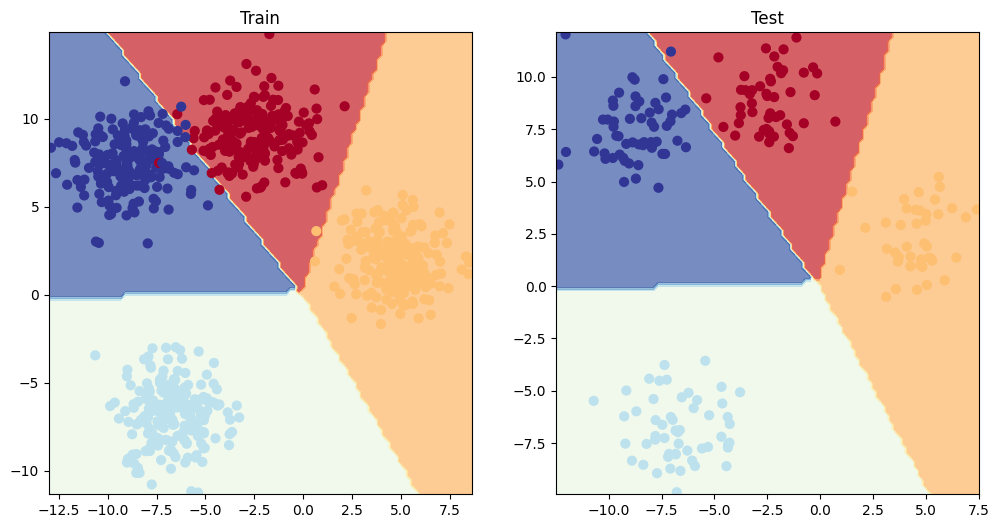

In [66]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

It is very important to note that the model does not create 'four lines' to seperate the decision boundaries but instead visualizes where the model draws these decision boundaries on. Notice how these boundaries are all linear?

We don't need to add non-linearity to the model because the groups of data can be linearilly seperated.

This would be a different case if the data is much more scattered and randomized. You might ask a question, why not just add a ReLU in-case? or why not accomodate for non-linearity just for the sake? One of the goals of machine learning in classification tasks is to find the simplest model that can make the best predictions. 

While it's true that you can accomodate for non-linearity, you could also make the argument that why shouldn't we just accomodate for everything that we can out there? 

If this is how things work then we'll have a very bloated model filled with unecessary features that will only complicate and slow things down.

That is why it is important to decide when to add or not to add a feature. 

Remember *Occam's Razor* - The simplest solution is usally the best

**More Classification Evaluation Metrics**

We've gotten over a couple of means that we can use to evaluate metrics which were accuracy, loss, and visualization of predictions. 

Naturally, these are the most common methods that you can come across and are even great starting points for many more.

Let's list some of these other evaluation metrics that you can use to improve models.

1. **Accuracy** - Answers the question: "Out of 100 predictions, how many did your model get correct?" For example, if you're model got 95/100 then that means you have an accuracy of 95%. *torchmetrics.Accuracy()* / *sklearn.metrics.precision_score()*

2. **Precision** - Answers the question: "Of all the instances the model labeled as positive, how many are actually positive?". Proportion of true positive predictions in the total predicted positives. Higher precision means fewer false positives.  *torchmetrics.Precision()* / *sklearn.metrics.precision_score()*

3. **Recall** - Answers the question: "Of all the actual positives, how many did the model label correctly". It is also known as sensitivity, is the proportion of true positives that were correctly identified by the model. Higher recall means fewer false negatives. *torchmetrics.Recall()* / *sklearn.metrics.recall_score()*

4. **F1-Score** - Combines both precision and recall into one metric. 1 is best while 0 is worst. *torchmetrics.F1Score()* / *sklearn.metrics.f1_score()*

5. **Confusion Matrix** - Compares predicted values with the true values in a tabular way. If it is 100% correct then all the values in the matrix will be top left to botto right. Basically forming a diagonal line. *torchmetrics.ConfusionMatrix* or *sklearn.metrics.plot_confusion_matrix()*.  --- MORE ON THIS --- 

6. **Classification Report** -  Collection of some of the main classification metrics such as precision, recall, and F1-Score. *sklearn.metrics.classification_report()*

Skicit-Learn is a popular machine learning library that has many implementations of the mentioned metrics above. If you want PyTorch-like versions then you can also check out TorchMetrics. 

Let's look at the *torchmetrics.Accuracy* and try it out.

In [67]:
from torchmetrics import Accuracy

# Setting up the metrics and making sure it's on the proper target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate Accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')